# Exploratory Visualization (_Hallelujah_ and _Into Dust_, Dublin and Taiwan only)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import sklearn

from pathlib import Path

## Retrieve and Subset Datasource

Retrieve all good trials for IDs that came from Javier's algorithm.

In [2]:
notebook_song_name = 'hallelujah_dust'

In [3]:
data_root = Path('../../neural_nets/fastai/combine-hallelujah-dust-dublin-taiwan/data')

df_all = pd.read_csv(data_root / 'good_reaction_trials_categorified_no_impute.csv')

pd.set_option('display.max_columns', None)
df_all.describe()

,visual_impairments,musical_expertise,age,control_activity,control_tension,control_familiarity,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,song_familiarity,song_engagement,song_positivity,song_like_dislike,control_power,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,song_power,musicpref_rock,musicpref_world,musicpref_dance,musicpref_traditional_irish,musicpref_classical,musicpref_pop,musicpref_jazz,musicpref_hip_hop,song_inspired,song_spirituality,song_thrills,song_chills,song_goosebumps,song_overwhelmed,song_shivers,musicpref_none,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,musicpref_folk,musicpref_hiphop
count,0.0,266.000000,419.000000,159.000000,159.000000,159.0,159.000000,159.000000,159.000000,164.000000,363.000000,393.000000,363.000000,363.000000,363.000000,363.000000,159.000000,30.000000,30.000000,70.000000,30.000000,70.000000,30.000000,70.000000,189.000000,419.000000,419.000000,419.000000,260.000000,419.000000,419.000000,419.000000,260.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,155.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,NaN,2.687970,25.973747,2.949686,3.503145,-1.0,3.138365,3.295597,3.088050,2.048780,3.399449,3.837150,2.666667,3.168044,3.225895,3.151515,3.232704,3.266667,3.100000,2.928571,1.966667,3.257143,3.666667,3.371429,3.359788,0.553699,0.188544,0.231504,0.165385,0.298329,0.646778,0.186158,0.203846,2.675000,2.800000,1.800000,2.250000,2.250000,2.450000,1.975000,0.025806,3.742138,2.339623,3.911950,3.138365,3.251572,3.622642,3.169811,3.584906,3.207547,3.075472,4.025157,0.113208,0.125786
std,NaN,1.121154,13.255198,1.135162,1.146675,0.0,1.285154,1.111240,1.388851,1.217484,1.047333,1.181897,1.505668,1.462939,1.223026,1.455288,1.181047,1.048261,1.241523,1.219663,0.964305,1.223984,0.884087,1.342412,1.307780,0.497702,0.391614,0.422298,0.372244,0.458072,0.478542,0.389699,0.403633,1.206553,1.381192,1.042679,1.255756,1.149136,1.338771,1.097491,0.159071,1.026323,1.277013,1.039618,1.166397,1.252686,1.251223,1.186461,1.170859,1.185757,1.139327,1.018498,0.317847,0.332656
min,NaN,1.000000,6.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,2.000000,17.000000,2.000000,3.000000,-1.0,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,NaN,3.000000,22.000000,3.000000,4.000000,-1.0,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,0.000000,0.000000
75%,NaN,3.000000,31.500000,4.000000,4.000000,-1.0,4.000000,4.000000,4.000000,3.000000,4.000000

In [4]:
print(f"Total N: {df_all.shape[0]}")

Total N: 419


In [5]:
df_reaction = df_all[df_all['critical_reaction'] == True]
df_no_reaction = df_all[df_all['critical_reaction'] == False]

In [6]:
print(f"Total reaction N: {df_reaction.shape[0]}")
print(f"Total no-reaction N: {df_no_reaction.shape[0]}")

Total reaction N: 186
Total no-reaction N: 233


In [7]:
df_all.columns

Index(['_id', 'location', 'sex', 'musical_background', 'nationality',
       'visual_impairments', 'musical_expertise', 'hearing_impairments', 'age',
       'critical_reaction', 'control_activity', 'control_tension',
       'control_familiarity', 'control_engagement', 'control_positivity',
       'control_like_dislike', 'song_chillsshiversthrills', 'song_activity',
       'song_tension', 'song_familiarity', 'song_engagement',
       'song_positivity', 'song_like_dislike', 'control_power',
       'song_transcendence', 'song_sadness', 'song_wonder',
       'song_joyfulactivation', 'song_tenderness', 'song_peacefulness',
       'song_nostalgia', 'song_power', 'song', 'musicpref_rock',
       'musicpref_world', 'musicpref_dance', 'musicpref_traditional_irish',
       'musicpref_classical', 'musicpref_pop', 'musicpref_jazz',
       'musicpref_hip_hop', 'song_inspired', 'song_spirituality',
       'song_thrills', 'song_chills', 'song_goosebumps', 'song_overwhelmed',
       'song_shivers', 'm

In [8]:
def combine_personality(regular, inverted):
    return regular + ((-1. * (inverted - 3)) + 3)

In [9]:
personality_traits = {
    'extraversion': {'normal': 'personality_outgoing', 'inverted': 'personality_reserved'},
    'agreeableness': {'normal': 'personality_trusting', 'inverted': 'personality_fault'},
    'conscientiousness': {'normal': 'personality_thorough', 'inverted': 'personality_lazy'},
    'neuroticism': {'normal': 'personality_nervous', 'inverted': 'personality_stress'},
    'openness': {'normal': 'personality_imagination', 'inverted': 'personality_artistic'},
}

In [10]:
for t in personality_traits:
    df_all['personality_' + t] = combine_personality(df_all[personality_traits[t]['normal']], df_all[personality_traits[t]['inverted']])
    df_all = df_all.drop(labels=[personality_traits[t]['normal'], personality_traits[t]['inverted']], axis=1)

In [11]:
df_all.columns

Index(['_id', 'location', 'sex', 'musical_background', 'nationality',
       'visual_impairments', 'musical_expertise', 'hearing_impairments', 'age',
       'critical_reaction', 'control_activity', 'control_tension',
       'control_familiarity', 'control_engagement', 'control_positivity',
       'control_like_dislike', 'song_chillsshiversthrills', 'song_activity',
       'song_tension', 'song_familiarity', 'song_engagement',
       'song_positivity', 'song_like_dislike', 'control_power',
       'song_transcendence', 'song_sadness', 'song_wonder',
       'song_joyfulactivation', 'song_tenderness', 'song_peacefulness',
       'song_nostalgia', 'song_power', 'song', 'musicpref_rock',
       'musicpref_world', 'musicpref_dance', 'musicpref_traditional_irish',
       'musicpref_classical', 'musicpref_pop', 'musicpref_jazz',
       'musicpref_hip_hop', 'song_inspired', 'song_spirituality',
       'song_thrills', 'song_chills', 'song_goosebumps', 'song_overwhelmed',
       'song_shivers', 'm

In [12]:
cat_cols = []

ord_cols = ['song_activity', 'song_tension', 'song_positivity', 'song_engagement', 'song_power']

cont_cols = []

In [13]:
# nationality_counts = df_all['nationality'].value_counts()
# patches, texts = plt.pie(nationality_counts, 
#                                     explode=[0.1] * len(nationality_counts));

# labels = ['{}: {}'.format(x.capitalize(), nationality_counts[x]) for x in nationality_counts.index]

# plt.legend(patches, labels)
# plt.savefig('hallelujah_reaction_pie_nationalities_{}_new_split.pdf'.format(notebook_song_name))

In [14]:
# language_counts = df_all['language'].value_counts()
# patches, texts = plt.pie(language_counts, 
#                                     explode=[0.1] * len(language_counts));

# languages = list(language_counts.index)
# for i in range(len(languages)):
#     language = languages[i]
#     if language == 'en':
#         languages[i] = 'English'
#     elif language == 'zh_TW':
#         languages[i] = 'Taiwanese'

# labels = ['{}: {}'.format(languages[i].capitalize(), language_counts[x]) for i, x in enumerate(language_counts.index)]

# plt.legend(patches, labels)
# plt.savefig('hallelujah_reaction_pie_languages_{}_new_split.pdf'.format(notebook_song_name))

In [15]:
def mardia(data, unbiased_cov=True):
    """
    data should have observations in rows
    """
    import numpy as np
    import scipy.stats as sps
    
    n = data.shape[0]
    p = data.shape[1]

    S = np.cov(data, rowvar=False, bias=not unbiased_cov)

    data_scaled = (data - data.mean(axis=0))

    D = np.matmul(np.matmul(data_scaled, np.linalg.pinv(S, rcond=1e-25)), data_scaled.T)

    product = D * D * D
    skewness = np.sum(product) / n**2
    kurtosis = (D * D).diagonal().sum() / n
    df = p * (p + 1) * (p + 2) / 6
    k = ((p + 1)*(n + 1)*(n + 3))/(n*((n + 1)*(p + 1) - 6))
    
    skew, kurt, skew_p, kurt_p = None, None, None, None
    if n < 20:
        skew = n * k * skewness / 6.
    else:
        skew = n * skewness / 6.
    
    chi2_test_skew = sps.chi2(df)
    skew_p = 1. - chi2_test_skew.cdf(skew)
    
    skew_result = False
    if skew_p > 0.05:
        skew_result = True
    
    kurt = (kurtosis - p * (p + 2)) * np.sqrt(n / (8 * p * (p + 2)))
    
    normal_test_kurt = sps.norm()
    kurt_p = 2. * (1. - normal_test_kurt.cdf(np.abs(kurt)))
    
    kurt_result = False
    if kurt_p  > 0.05:
        kurt_result = True
    
    result_skewness = {
        'test': 'Mardia Skewness',
        'statistic': skew,
        'p-value': skew_p,
        'result': skew_result
    }
    
    result_kurtosis = {
        'test': 'Mardia Kurtosis',
        'statistic': kurt,
        'p-value': kurt_p,
        'result': kurt_result
    }
    
    result = {
        'test': 'MVN',
        'result': skew_result and kurt_result
    }
    
    return result_skewness, result_kurtosis, result

In [16]:
def run_tests(x_label, dist_var, bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=False, print_output=False):
    
    if plots:
        f = plt.figure(figsize=(8, 4))
        sns.distplot(df_all[dist_var].dropna(), bins=bins, norm_hist=normed, kde=kde, rug=True, kde_kws={'bw': bw})
        plt.xlabel('')
        if x_lim is not None:
            plt.xlim([0.5, 5.5])

        g = sns.FacetGrid(df_all, hue='critical_reaction', height=4, aspect=2)
        g.map(sns.distplot, dist_var, bins=bins, norm_hist=normed, kde=kde, kde_kws={'bw': bw})
        g.set_xlabels(x_label)
        if x_lim is not None:
            g.axes[0,0].set_xlim([0.5, 5.5])
        g.fig.suptitle('Distribution of {} by reaction group'.format(dist_var), y=1.0)
        g.add_legend(title='Hallelujah Reaction');

        fig_file = 'hallelujah_reaction_distribution_hallelujah_{}_new_split.pdf'.format(dist_var)
        g.savefig(fig_file, orientation='landscape')
        
    mean_true = df_all[df_all['critical_reaction'] == True][dist_var].dropna()
    mean_false = df_all[df_all['critical_reaction'] == False][dist_var].dropna()
    
    all_normtest = sps.normaltest(df_all[dist_var])
    true_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == True][dist_var])
    false_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == False][dist_var])
    if print_output:
        print(f'All normal test results: {all_normtest}')
        print(f'Reaction normal test results: {true_normtest}')
        print(f'No-reaction normal test results: {false_normtest}')
    
    alpha = 0.05
    _, equal_variance_p = sps.levene(mean_true, mean_false)
    
    equal_var = None
    if equal_variance_p >= alpha:
        equal_var = True
    else:
        equal_var = False
    
    t_stat, t_p = sps.ttest_ind(mean_true, mean_false, equal_var=equal_var)
    u_stat, u_p = sps.mannwhitneyu(mean_true, mean_false, alternative='two-sided')

    if print_output:
        print('Student\'s t-test for difference in mean {} between Hallelujah Reaction groups'.format(x_label.capitalize()))

        print('T test statistic: {:.4f}'.format(t_stat))
        print('T test p-value: {:.4f}'.format(t_p))

        print('Mann-Whitney U test statistic: {:.4f}'.format(u_stat))
        print('Mann-Whitney U test p-value: {:.4f}'.format(u_p))

        if t_p <= alpha or u_p <= alpha:
            print('**** Significant Result ****')
    
    return {
        'mean_true': mean_true.mean(),
        'mean_false': mean_false.mean(),
        'median_true': mean_true.median(),
        'median_false': mean_false.median(),
        't_stat': t_stat,
        't_p': t_p,
        'u_stat': u_stat,
        'u_p': u_p
    }

In [17]:
# run_tests('Age [years]', 'age', bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=True, print_output=True)

In [18]:
df_results = pd.DataFrame({})

for c in ord_cols:
    try:
        result = run_tests(c, c)
        df_results = pd.concat([df_results, pd.DataFrame(result, index=[c])])
    except:
        print(f'Could not run tests for {c}')

In [19]:
df_results = df_results.sort_values(by='u_p')

i = np.arange(1, df_results.shape[0] + 1)
m = len(i)
Q = 0.25
benjamini_hochberg = ((i * 1.) / m) * Q
df_results['bh_threshold'] = benjamini_hochberg
df_results['significant'] = df_results.u_p < df_results.bh_threshold

df_results

,mean_true,mean_false,median_true,median_false,t_stat,t_p,u_stat,u_p,bh_threshold,significant
song_engagement,3.036810,3.275000,3.0,3.0,-1.531836,0.126514,14880.0,0.144385,0.05,False
song_activity,3.331288,3.455000,4.0,4.0,-1.119783,0.263551,15407.5,0.345481,0.10,False
song_power,3.425000,3.311927,4.0,3.0,0.586265,0.558405,4609.0,0.492528,0.15,False
song_tension,3.805714,3.862385,4.0,4.0,-0.471956,0.637222,18758.5,0.766186,0.20,False
song_positivity,3.202454,3.245000,3.0,3.0,-0.329263,0.742148,16092.5,0.830691,0.25,False


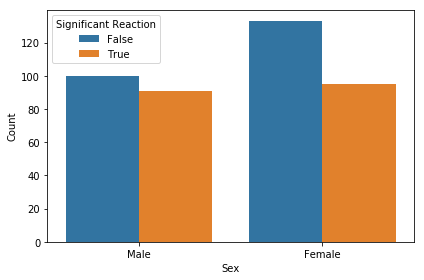

In [20]:
sns.countplot(x='sex', hue='critical_reaction', data=df_all)
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Significant Reaction')
plt.tight_layout()
plt.savefig(f'hallelujah_reaction_bar_sex_by_reaction_{notebook_song_name}_new_split.pdf')

In [21]:
# Chi-squared test of male/female proportions

cross = pd.crosstab(df_all['sex'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of sex vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
sex,,
female,100,91
male,133,95


Chi-squared test of sex vs hallelujah reaction proportions
Test statistic: 1.2719
p-value: 0.2594
Degrees of freedom: 1


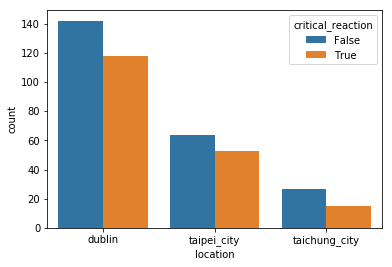

In [22]:
sns.countplot(x='location', hue='critical_reaction', data=df_all)

In [23]:
# Chi-squared test of location proportions

cross = pd.crosstab(df_all['location'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of location vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
location,,
dublin,142,118
taichung_city,27,15
taipei_city,64,53


Chi-squared test of location vs hallelujah reaction proportions
Test statistic: 1.4240
p-value: 0.4907
Degrees of freedom: 2


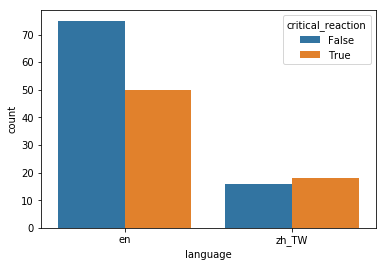

In [24]:
sns.countplot(x='language', hue='critical_reaction', data=df_all)

In [25]:
# Chi-squared test of language proportions

cross = pd.crosstab(df_all['language'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
language,,
en,75,50
zh_TW,16,18


Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)
Test statistic: 1.3384
p-value: 0.2473
Degrees of freedom: 1


Sources for Hotelling's $T^2$:
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hotellings_Two-Sample_T2.pdf
- https://onlinecourses.science.psu.edu/stat505/node/100/

In [26]:
def hotelling_t2(X_1, X_2, alpha):
    
    import scipy.stats as sps
    
    n_1 = len(X_1)
    n_2 = len(X_2)

    y_1 = X_1.mean().as_matrix()
    y_1 = y_1.reshape(len(y_1), -1)
    y_2 = X_2.mean().as_matrix()
    y_2 = y_2.reshape(len(y_2), -1)

    # Covariance matrices
    S_1 = np.cov(X_1.astype(np.float64).T)
    S_2 = np.cov(X_2.astype(np.float64).T)

    # Pooled variance
    S_pooled_num = ((n_1 - 1) * S_1) + ((n_2 - 1) * S_2)
    S_pooled_denom = n_1 + n_2 - 2
    S_pooled = S_pooled_num / S_pooled_denom
    
    T_2 = (n_1 * n_2) / (n_1 + n_2)
    T_2 = T_2 * np.matmul((y_1 - y_2).T, np.linalg.pinv(S_pooled))
    T_2 = np.matmul(T_2, (y_1 - y_2))
    T_2 = T_2.squeeze()
    
    p = len(X_1.columns)
    F_num = n_1 + n_2 - p - 1
    F_denom = p * (n_1 + n_2 - 2)
    F = (F_num / F_denom) * T_2
    F = F.squeeze()
    
    df_1 = p
    df_2 = n_1 + n_2 - p - 1
    F_dist = sps.f(df_1, df_2)
    p_value = F_dist.cdf(F)
    
    # Calculate effect size
    D_2 = ((n_1 + n_2) * T_2) / (n_1 * n_2)
    
    return({
        'T2': T_2,
        'F': F,
        'df': (df_1, df_2),
        'p': p_value,
        'D2': D_2
    })

# Pairwise Hotelling's $T^2$

In [27]:
import itertools

plot_vars = ord_cols + cont_cols

pairs = list(itertools.combinations(plot_vars, 2))

results = pd.DataFrame(columns=['p', 'adjustedP', 'F', 'T2', 'df1', 'df2', 'D2'])
total_tests = 0

for pair in pairs:
    test_vars = list(pair)
    test_vars.append('critical_reaction')
    df_pair = df_all[test_vars].dropna()
    df_pair_1 = df_pair[df_pair['critical_reaction'] == False].drop(['critical_reaction'], axis=1)
    df_pair_2 = df_pair[df_pair['critical_reaction'] == True].drop(['critical_reaction'], axis=1)
    
    if df_pair_1.shape[0] == 0 and df_pair_2.shape[0] == 0:
        continue
    
    mardia_result = mardia(df_pair.drop(['critical_reaction'], axis=1), unbiased_cov=True)

    if not mardia_result[2]['result']:
        continue

    t2_results = hotelling_t2(df_pair_1, df_pair_2, 0.05)
    p = t2_results['p']
    adjusted_p = p * len(pairs)
    if adjusted_p > 1:
        adjusted_p = 1
        
    row = pd.DataFrame(
        {
            'p': t2_results['p'], 
            'adjustedP': adjusted_p,
            'F': t2_results['F'], 
            'T2': t2_results['T2'], 
            'df1': t2_results['df'][0], 
            'df2': t2_results['df'][1],
            'D2': t2_results['D2']
        }, 
        index=[pair])

    results = pd.concat([results, row])
    
alpha = 0.05

results.adjustedP = results.p * results.shape[0]
    
with pd.option_context('display.max_rows', None, 'display.float_format', lambda x: '%.5f' % x):
#     display('Tests for difference between combined means of {} and {} between hallelujah reaction groups:'.format(pair[0], pair[1]))
    display(results.sort_values(by='p'))

results.to_csv('hotelling_comparisons_{}.csv'.format(notebook_song_name))

,p,adjustedP,F,T2,df1,df2,D2


In [28]:
sig_results = results[results.adjustedP <= .05]

if sig_results.shape[0] > 0:
    for pair in sig_results.index.values:
        g = sns.FacetGrid(df_all[[pair[0], pair[1], 'critical_reaction']], col='critical_reaction', height=6, aspect=1, margin_titles=True)
        g.set_titles()
        g.map(sns.kdeplot, pair[0], pair[1], cmap='Reds', shade=True, shade_lowest=False, alpha=0.8)
        g.savefig('hallelujah_reaction_distributions_{}_{}_{}_by_reaction.pdf'.format(notebook_song_name, pair[0], pair[1]))
else:
    print('No significant results to plot')

sig_results

No significant results to plot


,p,adjustedP,F,T2,df1,df2,D2


# $t$ tests for differences between control/experimental stimuli

In [29]:
def new_test(variable, song, reaction):
    
    control = df_all[(df_all.song == song + '_taiwan') | (df_all.song == song + '_dublin') & (df_all.critical_reaction == reaction)]['control_' + variable]
    experimental = df_all[(df_all.song == song + '_taiwan') | (df_all.song == song + '_dublin') & (df_all.critical_reaction == reaction)]['song_' + variable]
    
    control = control.dropna()
    experimental = experimental.dropna()

    _, equal_var_p = sps.levene(control, experimental)
    
    t_stat, t_p = sps.ttest_ind(control, experimental, equal_var=(equal_var_p <= .05))
    
    adjusted_t_p = t_p * 5. # Running five tests for each group
    
    control_n = len(control)
    experimental_n = len(experimental)
    
    dof = control_n + experimental_n - 2    
    
    control_std = control.std()
    experimental_std = experimental.std()
    
    pooled_std = np.sqrt(((control_n - 1.) * (control_std)**2 + (experimental_n - 1.) * (experimental_std)**2) / dof) 

    diff_mean = control.mean() - experimental.mean()
    
    MoE = sps.t.ppf(0.975, dof) * pooled_std * np.sqrt(1./control_n + 1./experimental_n)
    ci_left, ci_right = diff_mean - MoE, diff_mean + MoE
    
    cohen = diff_mean / pooled_std
    
    if reaction:
        index = variable + '_reaction'
    else:
        index = variable + '_no_reaction'
    
    return pd.DataFrame({
        't_stat': t_stat,
        'p': t_p,
        'adjusted_p': adjusted_t_p,
        'ci_lower': ci_left,
        'ci_upper': ci_right,
        'cohens_d': cohen
    }, index=[index])

In [30]:
variables = ['activity', 'positivity', 'power', 'tension', 'engagement']
songs = ['dust', 'hallelujah']
reactions = [True, False]

mindex = pd.MultiIndex.from_product([variables, songs, reactions], names=['Variable', 'Song', 'Reaction'])

tests_df = pd.DataFrame(np.zeros((20, 6)), columns=['t_stat', 'p', 'adjusted_p', 'ci_lower', 'ci_upper', 'cohens_d'], index=mindex)

for m in mindex:
    variable, song, reaction = m[0], m[1], m[2]
    r = new_test(variable, song, reaction)
    tests_df.loc[variable, song, reaction] = [r['t_stat'], r['p'], r['adjusted_p'], r['ci_lower'], r['ci_upper'], r['cohens_d']]

In [31]:
tests_df.to_excel('control_exp_tests.xlsx')
tests_df.round(6)

t_stat         p  adjusted_p  ci_lower  \
Variable   Song       Reaction                                             
activity   dust       True     -3.650959  0.000350    0.001752 -0.862266   
                      False    -3.436621  0.000743    0.003715 -0.839452   
           hallelujah True     -1.237339  0.217779    1.088895 -0.523560   
                      False    -2.919267  0.004091    0.020457 -0.746975   
positivity dust       True     -2.533957  0.012166    0.060829 -0.728803   
                      False    -2.865425  0.004689    0.023446 -0.774578   
           hallelujah True     -0.092511  0.926391    4.631954 -0.353069   
                      False     0.804195  0.422327    2.111633 -0.199794   
power      dust       True     -1.198454  0.232538    1.162692 -0.623550   
                      False    -0.921980  0.357925    1.789627 -0.567489   
           hallelujah True     -0.612987  0.540719    2.703595 -0.504760   
                      False    -0.580104  0.562613    2.813064 -0.482726   
tension    dust       True     -5.221318  0.000001    0.000003 -1.137988   
                      False    -4.733975  0.000005    0.000025 -1.070868   
           hallelujah True     -1.052002  0.294234    1.471170 -0.487901   
                      False    -1.143797  0.254310    1.271548 -0.490144   
engagement dust       True     -3.813460  0.000189    0.000943 -1.093596   
                      False    -4.524589  0.000011    0.000056 -1.189284   
           hallelujah True     -0.104665  0.916752    4.583760 -0.423829   
                      False     0.006675  0.994682    4.973409 -0.374731   

                                ci_upper  cohens_d  
Variable   Song       Reaction                      
activity   dust       True     -0.257039 -0.529591  
                      False    -0.225405 -0.498257  
           hallelujah True      0.115317 -0.177531  
                      False    -0.165280 -0.426588  
positivity dust       True     -0.085141 -0.362116  
                      False    -0.139234 -0.413249  
           hallelujah True      0.322437 -0.012599  
                      False     0.458307  0.106851  
power      dust       True      0.153979 -0.188095  
                      False     0.207912 -0.143591  
           hallelujah True      0.266264 -0.094033  
                      False     0.263993 -0.088100  
tension    dust       True     -0.526236 -0.772818  
                      False    -0.450500 -0.696667  
           hallelujah True      0.152452 -0.144129  
                      False     0.135052 -0.152575  
engagement dust       True     -0.334673 -0.538919  
                      False    -0.461222 -0.651348  
           hallelujah True      0.382615 -0.014199  
                      False     0.377217  0.000899

In [32]:
df_all.sex.value_counts()

male      228
female    191
Name: sex, dtype: int64

In [33]:
df_all.age.describe()

count    419.000000
mean      25.973747
std       13.255198
min        6.000000
25%       17.000000
50%       22.000000
75%       31.500000
max       81.000000
Name: age, dtype: float64

In [34]:
531 - 228 - 191

112

In [35]:
228 + 191

419